# Activity 1 : Hierarchical Clustering

Create four clusters from text documents of sklearn's “The 20 newsgroups text dataset” using hierarchical clustering. Compare it with their actual categories.

In [1]:
from sklearn.datasets import fetch_20newsgroups
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib as mpl
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from pylab import *
import nltk
import warnings
warnings.filterwarnings('ignore')

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sohom.ghosh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stop_words = stopwords.words('english')

#adding individual printable characters to list of wtop words so that they get renoved along with the stopwords
stop_words = stop_words + list(string.printable)

In [4]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sohom.ghosh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
categories= ['misc.forsale', 'sci.electronics', 'talk.religion.misc']
news_data = fetch_20newsgroups(subset='train', categories=categories,\
                               shuffle=True, random_state=42, download_if_missing=True)

In [6]:
news_data['data']

['From: Steve@Busop.cit.wayne.edu (Steve Teolis)\nSubject: Re: *** TurboGrafx System For SALE ***\nOrganization: Wayne State University\nLines: 38\nDistribution: na\nNNTP-Posting-Host: 141.217.75.24\n\n>TurboGrafx-16 Base Unit (works like new) with:\n>       1 Controller\n>       AC Adapter\n>       Antenna hookup\n>     * Games:\n>         Kieth Courage\n>         Victory Run\n>         Fantasy Zone\n>         Military Madness\n>         Battle Royal\n>         Legendary Axe\n>         Blazing Lasers\n>         Bloody Wolf\n>\n>  --------------------------------------\n>* Will sell games separatley at $25 each\n>  --------------------------------------\n\nYour kidding, $210.00, man o man, you can buy the system new for $49.00 at \nElectronic Boutique and those games are only about $15 - $20.00 brand new.  \nMaybe you should think about that price again if you REALLY need the money.\n\n\n\n\n\n\n                        \n                        \n                        -=-=-=-=-=-=-=-

In [7]:
news_data.target

array([0, 0, 1, ..., 0, 1, 0])

In [8]:
Counter(news_data.target)

Counter({0: 585, 1: 591, 2: 377})

In [9]:
news_data.target_names

['misc.forsale', 'sci.electronics', 'talk.religion.misc']

In [10]:
news_data_df = pd.DataFrame({'text' : news_data['data'], 'category': news_data.target})
news_data_df.head()

,text,category
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0


In [11]:
news_data_df['category'].value_counts()

1    591
0    585
2    377
Name: category, dtype: int64

In [12]:
news_data_df['cleaned_text'] = news_data_df['text'].apply(\
lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) \
    for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', str(x))) if word.lower() not in stop_words]))

In [13]:
news_data_df.shape

(1553, 3)

In [14]:
tfidf_model = TfidfVectorizer(max_features=200)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(news_data_df['cleaned_text']).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,00,10,100,12,14,15,16,20,25,30,...,well,wire,wiring,without,word,work,world,would,writes,year
0,0.435655,0.0,0.000000,0.0,0.000000,0.127775,0.136811,0.127551,0.133311,0.0,...,0.0,0.0,0.0,0.0,0.0,0.113042,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.000000,0.0,0.000000,0.294937,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.142267,0.106317,0.100306,0.0
4,0.000000,0.0,0.207003,0.0,0.191897,0.182138,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0


In [15]:
dist = 1 - cosine_similarity(tfidf_df)
linkage_matrix = ward(dist) 
fig, ax = plt.subplots(figsize=(200, 200),dpi=100)
ax = dendrogram(linkage_matrix, orientation="right", labels=list(tfidf_df.index))

plt.tick_params(
    axis= 'x',          
    which='both',      
    bottom='off',      
    top='off',         
    labelbottom='off')

plt.title('A dendogram of the NEWS documents created from their TF-IDF retresentation')
plt.show()

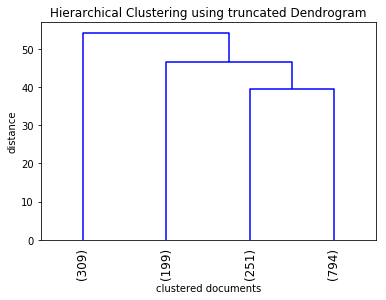

In [16]:
#Truncating the Dendogram Truncation to show last 4 clusters
plt.title('Hierarchical Clustering using truncated Dendrogram')
plt.xlabel('clustered documents')
plt.ylabel('distance')
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # showing only last p clusters after merging
    p=4,  # p is the number of cluster that should remain after merging 
    leaf_rotation=90.,
    leaf_font_size=12.
    )
plt.show()

In [17]:
#Let's create 4 cluster from the linkage matrix
k=4
clusters = fcluster(linkage_matrix, k, criterion='maxclust')
clusters

array([3, 3, 3, ..., 4, 4, 1], dtype=int32)

In [18]:
news_data_df['obtained_clusters'] = clusters

In [19]:
#Let's validate the cluster we have created with the actual categories
pd.crosstab(news_data_df['category'].replace({0:'misc.forsale', 1:'sci.electronics', 2:'talk.religion.misc'}),\
            news_data_df['obtained_clusters'].\
            replace({1 : 'cluster_1', 2 : 'cluster_2', 3 : 'cluster_3', 4: 'cluster_4'}))


obtained_clusters,cluster_1,cluster_2,cluster_3,cluster_4
category,,,,
misc.forsale,155,0,230,200
sci.electronics,110,1,19,461
talk.religion.misc,44,198,2,133
